# How to Handle Imbalanced Classes in Dataset

[Muhammad Faiz Ar](https://www.linkedin.com/in/faiz-arif) <br>
May 29 2020

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

## Foreword
اَلسَّلَامُ عَلَيْكُمْ وَرَحْمَةُ اللهِ وَبَرَكَا تُهُ and peace be upon you.
<br>
<p> In this article I will discuss a problem that is often found in datasets if you want to build a machine learning classification model, what is the effect ? and how to solve it ?

## Introduction
unbalanced or imbalanced class is a case where the target column in the dataset you want to use as a machine learning model does not have the number of classes or one of the classes in the target column has a higher number than other classes. case examples like those in the [Churn](https://www.kaggle.com/mnassrib/telecom-churn-datasets) dataset which contain customer data on telecommunications companies and one of the columns has the label 'Churn' which will be the target column

In [86]:
customer = pd.read_csv('Dataset/telecom_churn.csv')

customer.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


0    0.86
1    0.14
Name: Churn, dtype: float64

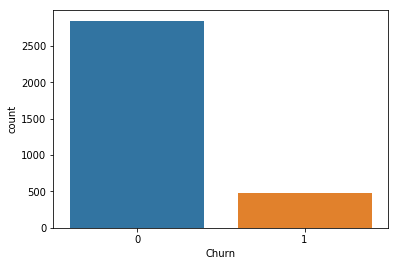

In [98]:
sns.countplot(x='Churn', data = customer)

customer['Churn'].value_counts(normalize = True).round(2)

<p> the churn column to be used as the target column has 2 classes, 0 and 1, where 0 means "no churn" and 1 means "churn". the plot above can be concluded that the number of class 0 is more than class 1 even the percentage is 86% - 14%

## The Impact

<p> differences in the large number of target column classes have a considerable impact on machine learning models including the weak accuracy of machine learning in predicting minority classes.<br>

below I will make a model and then see the confusion matrix.

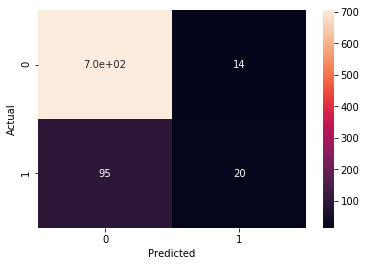

In [99]:
X = customer.loc[:, customer.columns != 'Churn']
# or used x=data.drop('temp',axis=1)
y = customer['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [74]:
print('Accuracy: {0:0.2f} '.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.87 


<p> the accuracy of this model is 87%, a sufficient number to say a good model. but, in the confusion matrix can be seen actual 1 - predicted 1 only 20 and actual 1 - predicted 0 totaled 95. In essence, out of 115 people (95 + 20) correct churn predicted only 17%, whereas the most important in predictions churn is predicting customers who cancel service or Churn<br>

<p> this is the impact of class imbalance on the target column

### How to solve it?

<p> Reducing the majority class or adding a minority class, in data science is called **Up-sample Minority Class** and **Down-sample Majority Class**.

In [100]:
# Module for resampling
from sklearn.utils import resample

#### 1. Up-sample Minority Class
Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.
There are several heuristics for doing so, but the most common way is to simply resample with replacement.
First, we'll import the resampling module from Scikit-Learn:

- First, we'll separate observations from each class into different DataFrames.
- Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
- Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

<p> Source : [Elite Data Science](https://elitedatascience.com/imbalanced-classes)

In [76]:
# Separate majority and minority classes
target_majority = customer[customer.Churn == 0]
target_minority = customer[customer.Churn == 1]

# Upsample minority class
target_minority_upsampled = resample(target_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= 2850,  # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
target_upsampled = pd.concat([target_majority, target_minority_upsampled])

# Display new class counts
target_upsampled['Churn'].value_counts()

1    2850
0    2850
Name: Churn, dtype: int64

as can be seen the sum of the two classes is now balanced

In [77]:
X = target_upsampled.loc[:, customer.columns != 'Churn']
# or used x=data.drop('temp',axis=1)
y = target_upsampled['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,561,163
1,165,536


In [78]:
print('Accuracy: {0:0.2f} '.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.77 


overall accuracy is indeed reduced but accuracy for predicting class 1 increases to 76%

#### 2. Down-sample Majority Class

Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.
The most common heuristic for doing so is resampling without replacement.

The process is similar to that of up-sampling. Here are the steps:
<br/> First, we'll separate observations from each class into different DataFrames.
<br/> Next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.
<br/> Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

<br/> Source : [Elite Data Science](https://elitedatascience.com/imbalanced-classes)

In [79]:
# Separate majority and minority classes
target_majority_sampled = customer[customer.Churn == 0]
target_minority_sampled = customer[customer.Churn == 1]

# Upsample minority class
target_majority_downsampled = resample(target_majority_sampled, 
                                 replace=False,     # sample without replacement
                                 n_samples= 483,    # to match majority class
                                 random_state=123)  # reproducible results

# Combine majority class with upsampled minority class
target_downsampled = pd.concat([target_majority_downsampled, target_minority_sampled])

# Display new class counts
target_downsampled['Churn'].value_counts()

1    483
0    483
Name: Churn, dtype: int64

In [80]:
X = target_downsampled.loc[:, customer.columns != 'Churn']
# or used x=data.drop('temp',axis=1)
y = target_downsampled['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,93,24
1,33,92


In [81]:
print('Accuracy: {0:0.2f} '.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.76 


the same as up-sample, down-sample decreases overall accuracy but increases class 1 prediction accuracy by 74%

### Conclusion
<p> Imbalance of the amount of data in the column class is very often found when wanting to make a classification of machine learning models where the impact can reduce accuracy of minority classes, as for ways to overcome them including Up-Sample or Down-Sample which can make the number of classes balanced.

<p> Actually there are still a few more ways to overcome class imbalances in the target column as in the [Elite Data Science](https://elitedatascience.com/imbalanced-classes) article.

thank you for reading this article, I really need criticism and suggestions for improvement in the future

اَلسَّلَامُ عَلَيْكُمْ وَرَحْمَةُ اللهِ وَبَرَكَا تُهُ